<a href="https://colab.research.google.com/github/para662/BSC_DPDM/blob/main/Ch4_Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [2]:
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/GreenFN/BSC_DPDM2025'

In [5]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1') #encoding= 'latin-1' bc. มีภาษาที่เป็นจุด ๆ บนหัวทำให้ข้อมมูลเละ

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/GreenFN/BSC_DPDM2025/reduced_marketbasket.csv'

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [ ]:
data.isnull().any()

,0
InvoiceNo,False
StockCode,False
Description,True
Quantity,False
InvoiceDate,False
UnitPrice,False
CustomerID,True
Country,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## การเตรียมข้อมูลสำหรับ Apriori Algorithm

ข้อมูลที่ใช้มักจะอยู่ในรูปแบบของธุรกรรม (Transactions) โดยแต่ละธุรกรรมจะประกอบไปด้วยชุดของรายการ (Items)

InvoiceNo = รหัสใบเสร็จ, StockCode = รหัสสินค้า, Description = คำอธิบายรายการสินค้า, Quantity = จำนวนชิ้น, InvoiceDate = วันที่ซื้อ, UnitPrice = ราคาต่อหน่วย, CustomerID = รหัสสมาชิกลูกค้า, Country = ประเทศที่ตั้ง กรณีมีหลายสาขา

In [7]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list) #รวม ให้สินค้ารหัสใบเสร็จเดียวกันมาอยู่ด้วยกัน # จัดกลุ่มข้อมูล .apply(func  ที่จะทำ)
transactions

NameError: name 'data' is not defined

## Association Rules

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
list(apriori(transactions,min_support = 0.5))

[]

In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.065))
frequentItemsets

[RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)]),
 RelationRecord(items=frozenset({'47566'}), support=0.06586872586872587, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'47566'}), confidence=0.06586872586872587, lift=1.0)]),
 RelationRecord(items=frozenset({'85099B'}), support=0.08243243243243244, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.08243243243243244, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.08671814671814672, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.08671814671814672, lift=1.0)])]

In [ ]:
len(frequentItemsets)

4

In [ ]:
frequentItemsets[0]

RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)])

In [ ]:
data[data['StockCode']=='47566']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5535,536864,47566,PARTY BUNTING,1,12/03/2010 11:27,9.32,NaN,United Kingdom
5656,536865,47566,PARTY BUNTING,3,12/03/2010 11:28,9.32,NaN,United Kingdom
6022,536876,47566,PARTY BUNTING,2,12/03/2010 11:36,8.47,NaN,United Kingdom
6572,536956,47566,PARTY BUNTING,5,12/03/2010 12:43,4.65,14210.0,United Kingdom
7904,537065,47566,PARTY BUNTING,5,12/05/2010 11:57,4.65,12567.0,France
...,...,...,...,...,...,...,...,...
537784,581345,47566,PARTY BUNTING,5,12/08/2011 12:15,4.95,17315.0,United Kingdom
538825,581417,47566,PARTY BUNTING,8,12/08/2011 15:01,4.95,13013.0,United Kingdom
539027,581426,47566,PARTY BUNTING,1,12/08/2011 15:31,4.95,17757.0,United Kingdom
540534,581492,47566,PARTY BUNTING,2,12/09/2011 10:03,10.79,NaN,United Kingdom


In [ ]:
frequentItemsets = list(apriori(transactions,min_support = 0.03))
frequentItemsets

[RelationRecord(items=frozenset({'20712'}), support=0.033667953667953665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.033667953667953665, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.03254826254826255, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.03254826254826255, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04054054054054054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04054054054054054, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.062084942084942085, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.062084942084942085, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04003861003861004, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [ ]:
frequentItemsets[-2]

RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])

In [ ]:
data[data['StockCode']=='85099B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 09:57,1.65,16029.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 10:19,1.65,17511.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/01/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/08/2011 14:38,2.08,14415.0,United Kingdom
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/08/2011 15:23,2.08,15898.0,United Kingdom
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/08/2011 16:30,4.13,NaN,United Kingdom
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/09/2011 09:38,2.08,17001.0,United Kingdom


In [ ]:
data[data['StockCode']=='22386']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
86,536378,22386,JUMBO BAG PINK POLKADOT,10,12/01/2010 09:37,1.95,14688.0,United Kingdom
789,536464,22386,JUMBO BAG PINK POLKADOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom
1428,536542,22386,JUMBO BAG PINK POLKADOT,30,12/01/2010 14:11,1.95,16456.0,United Kingdom
2427,536591,22386,JUMBO BAG PINK POLKADOT,1,12/01/2010 16:57,1.95,14606.0,United Kingdom
2712,536592,22386,JUMBO BAG PINK POLKADOT,3,12/01/2010 17:06,4.21,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
534742,581167,22386,JUMBO BAG PINK POLKADOT,20,12/07/2011 14:52,2.08,13534.0,United Kingdom
537138,581238,22386,JUMBO BAG PINK POLKADOT,5,12/08/2011 10:53,4.13,NaN,United Kingdom
539585,581439,22386,JUMBO BAG PINK POLKADOT,2,12/08/2011 16:30,4.13,NaN,United Kingdom
541421,581498,22386,JUMBO BAG PINK POLKADOT,1,12/09/2011 10:26,4.13,NaN,United Kingdom


In [ ]:
len(frequentItemsets[-2])

3

In [ ]:
frequentItemsets[-2][0]

frozenset({'22386', '85099B'})

In [ ]:
frequentItemsets[-2][1]

0.03216216216216216

In [ ]:
frequentItemsets[-2][2]

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0),
 OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335),
 OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)]

In [ ]:
len(frequentItemsets[-2][2])

3

In [ ]:
frequentItemsets[-2][2][1]

OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335)

In [ ]:
frequentItemsets[-2][2][2]

OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)

# HW 2 หา pattern ที่น่าสนใจใน Dataset หนังอินเดีย (india imdb)

In [10]:
India_data = pd.read_csv(os.path.join(path,'/content/drive/MyDrive/dataอ.ต้นล่าสุด1/IMDb Movies India.csv'),encoding='latin-1')
India_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## ตรวจสอบ + จัดการค่าว่าง

In [11]:
India_data.isnull().any()

,0
Name,False
Year,True
Duration,True
Genre,True
Rating,True
Votes,True
Director,True
Actor 1,True
Actor 2,True
Actor 3,True


In [12]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [13]:
# คำนวณสัดส่วนของค่าว่างในแต่ละคอลัมน์
missing_data = India_data.isnull().sum() / len(India_data) * 100
missing_data

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


### ชื่อ

In [14]:
print(len(India_data[India_data['Name'].isnull()]))
India_data[India_data['Name'].isnull()]

0


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [15]:
India_data.loc[0,'Name']= '"space"'  #loc ชี้ไปที่ตารางด้วยแถวและคอลัมน์ทีาเราสนใจ จะเปลี่ยนชื่อ

In [16]:
India_data['Name'].unique()

array(['"space"', '#Gadhvi (He thought he was Gandhi)', '#Homecoming',
       ..., 'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

### ปี (missing 3.40%)

In [18]:
print(len(India_data[India_data['Year'].isnull()]))
India_data[India_data['Year'].isnull()]

528


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,"""space""",NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
23,12 Years,NaN,NaN,Biography,NaN,NaN,Sohail Tatari,NaN,NaN,NaN
37,1911,NaN,NaN,"Drama, History, Sport",NaN,NaN,Nikkhil Advani,John Abraham,NaN,NaN
48,2 GB Ki Life,NaN,NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15177,Yakshya,NaN,NaN,Horror,NaN,NaN,Linkan Mahapatra,NaN,NaN,NaN
15315,Yubi Lakpi,NaN,NaN,Biography,NaN,NaN,NaN,NaN,NaN,NaN
15316,Yubi Lukpi,NaN,NaN,Drama,NaN,NaN,Omung Kumar,NaN,NaN,NaN
15337,Zahoor,NaN,NaN,Action,NaN,NaN,Pankaj Batra,Parineeti Chopra,Parmish Verma,Rahul Sharma


In [19]:
India_data['Year'] = India_data['Year'] = India_data['Year'].str.replace('(', '').str.replace(')', '').astype(float)

ผู้กำกับคนเดียวกันน่าจะผลิตหนังในปีใกล้ๆ เคียงกัน

In [20]:
India_data['Year'].fillna(India_data.groupby('Director')['Year'].transform('mean'))

,Year
0,2017.0
1,2019.0
2,2021.0
3,2019.0
4,2010.0
...,...
15504,1988.0
15505,1999.0
15506,2005.0
15507,1988.0


Director เพราะน่าจะผลิตหนังในช่วงเดียวๆ กัน

In [21]:
India_data['Year'] = India_data['Year'].fillna(India_data.groupby('Director')['Year'].transform('mean'))

In [22]:
print(len(India_data[India_data['Year'].isnull()]))
India_data[India_data['Year'].isnull()].head(5)

324


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
48,2 GB Ki Life,NaN,NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
93,4 Sum,NaN,96 min,"Crime, Drama, Thriller",NaN,NaN,Neeraj Gwal,Pranav Chandrakar,Yashwant Anand Gupta,Neeraj Uke
112,69 Reality in Us,NaN,NaN,"Drama, Romance, Thriller",NaN,NaN,Samir Khan,NaN,NaN,NaN
122,777 Charlie,NaN,136 min,"Adventure, Comedy, Drama",NaN,NaN,Kiranraj K,Rakshit Shetty,Charlie,Sangeetha Sringeri


### ประเภทหนัง (missing 12.10%)

In [23]:
print(len(India_data[India_data['Genre'].isnull()]))
India_data[India_data['Genre'].isnull()]

1877


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
19,11 O'Clock,1948.0,NaN,NaN,NaN,NaN,Homi Wadia,Aftab,Sayani Atish,Austin Ki Bachchi
31,150 Seconds Ago,2002.0,112 min,NaN,NaN,NaN,Batul Mukhtiar,NaN,NaN,NaN
65,25th July,1951.0,NaN,NaN,7.6,5,Chitra Mitra,NaN,NaN,NaN
66,26 January,1956.0,NaN,NaN,6.6,7,Ramesh Saigal,Ajit,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15473,Zindagi Ke Mele,1956.0,NaN,NaN,NaN,NaN,K.B. Lall,Chandrashekhar,Chitra,Dulari
15480,Zindagi Unlimited,2021.0,105 min,NaN,NaN,NaN,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15485,Zingaro,1963.0,NaN,NaN,NaN,NaN,Chandrakant,Bela Bose,Laxmi Chhaya,Aruna Irani
15486,Zingaro,1935.0,NaN,NaN,NaN,NaN,S.N. Bhende,Pushpa,NaN,NaN


In [24]:
India_data_Genre_Na =  India_data[India_data['Genre'].isnull()]
India_data_Genre_Na

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
19,11 O'Clock,1948.0,NaN,NaN,NaN,NaN,Homi Wadia,Aftab,Sayani Atish,Austin Ki Bachchi
31,150 Seconds Ago,2002.0,112 min,NaN,NaN,NaN,Batul Mukhtiar,NaN,NaN,NaN
65,25th July,1951.0,NaN,NaN,7.6,5,Chitra Mitra,NaN,NaN,NaN
66,26 January,1956.0,NaN,NaN,6.6,7,Ramesh Saigal,Ajit,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15473,Zindagi Ke Mele,1956.0,NaN,NaN,NaN,NaN,K.B. Lall,Chandrashekhar,Chitra,Dulari
15480,Zindagi Unlimited,2021.0,105 min,NaN,NaN,NaN,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15485,Zingaro,1963.0,NaN,NaN,NaN,NaN,Chandrakant,Bela Bose,Laxmi Chhaya,Aruna Irani
15486,Zingaro,1935.0,NaN,NaN,NaN,NaN,S.N. Bhende,Pushpa,NaN,NaN


In [25]:
India_data_Name_dup = India_data[India_data['Name'].duplicated()] #ดูชื่อหนังที่ซ้ำกัน
India_data_Name_dup

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
22,12 O'Clock,2021.0,105 min,"Horror, Thriller",4.4,63,Ram Gopal Varma,Mithun Chakraborty,Makrand Deshpande,Dalip Tahil
101,5 Rifles,2001.0,NaN,Action,NaN,NaN,Hemant Birje,Anu Kashyap,Raza Murad,Paintal
136,A Ballad of Maladies,2016.0,86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN
180,Aa Gale Lag Jaa,1994.0,158 min,"Mystery, Romance",4.4,115,Hamid Ali Khan,Jugal Hansraj,Urmila Matondkar,Paresh Rawal
186,Aabroo,1968.0,170 min,"Comedy, Crime, Drama",5.5,21,C.L. Rawal,Ashok Kumar,Vimi,Rehman
...,...,...,...,...,...,...,...,...,...,...
15459,Zindagi,1956.0,NaN,NaN,NaN,NaN,C.L. Dheer,Geeta Bali,NaN,NaN
15460,Zindagi,2000.0,118 min,Romance,2.8,8,Suraj Prakash,Vicky Bhalla,Gayatri,Deepak Jethi
15461,Zindagi,1942.0,NaN,Drama,NaN,NaN,Amiya Chakrabarty,Master Bhagwan,Nalini Jaywant,Ashok Kumar
15467,Zindagi Aur Maut,2002.0,119 min,Action,NaN,NaN,Ramesh U. Lakhiani,Arun Mathur,Anil Nagrath,Amit Pachori


In [26]:
name_genre = {} # สร้าง dict เก็บชื่อหนัง+ประเภท
for i in range(len(India_data)):
    if pd.notna(India_data.loc[i, 'Genre']):  # ใช้ pd.notna เพื่อตรวจสอบว่าไม่เป็นค่าว่าง
        name_genre[India_data.loc[i, 'Name']] = India_data.loc[i, 'Genre']

for i in range(len(India_data)): # เติมประเภทหนัง จากชื่อที่เหมือนกัน ด้วยประเภทที่เจอล่าสุด กรณีซ้ำ
    if pd.isnull(India_data.loc[i, 'Genre']):  # ใช้ pd.isnull เพื่อตรวจสอบค่าว่าง
        if India_data.loc[i, 'Name'] in name_genre:
            India_data.loc[i, 'Genre'] = name_genre[India_data.loc[i, 'Name']]

In [27]:
print(len(India_data[India_data['Genre'].isnull()]))
India_data[India_data['Genre'].isnull()].head(5)

1393


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
19,11 O'Clock,1948.0,NaN,NaN,NaN,NaN,Homi Wadia,Aftab,Sayani Atish,Austin Ki Bachchi
31,150 Seconds Ago,2002.0,112 min,NaN,NaN,NaN,Batul Mukhtiar,NaN,NaN,NaN
65,25th July,1951.0,NaN,NaN,7.6,5,Chitra Mitra,NaN,NaN,NaN
66,26 January,1956.0,NaN,NaN,6.6,7,Ramesh Saigal,Ajit,NaN,NaN


### Rating (48.939326%)

In [28]:
print(len(India_data[India_data['Rating'].isnull()]))
India_data[India_data['Rating'].isnull()].head(5)

7590


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,"""space""",2017.0,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,1990.0,NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN


IMDb Rating: ใช้ระบบ 10 จุด โดยผู้ชมทั่วไปจะให้คะแนนภาพยนตร์หรือรายการโดยหลังจากได้ชม คะแนนเหล่านี้จะถูกรวมและคำนวณเป็นค่าเฉลี่ยเพื่อสะท้อนถึงคุณภาพหรือความนิยมโดยรวมของผลงานนั้นๆ



In [29]:
India_data['Rating'].max()

10.0

In [30]:
India_data['Rating'].min()

1.1

In [31]:
India_data.groupby('Genre')['Rating'].mean().round(1)

,Rating
Genre,
Action,5.1
"Action, Adventure",5.6
"Action, Adventure, Biography",7.8
"Action, Adventure, Comedy",5.6
"Action, Adventure, Crime",5.6
...,...
"Thriller, Action",4.3
"Thriller, Musical, Mystery",7.1
"Thriller, Mystery",6.5


ใช้ .transform('mean') เพื่อสร้าง Series ที่มีขนาดเท่าเดิมกับข้อมูลต้นทาง เพื่อเติมค่าเฉลี่ยเข้าไปที่ตำแหน่งที่มีค่าว่างโดยตรง

In [32]:
India_data['Rating'] = India_data['Rating'].fillna(India_data.groupby('Genre')['Rating'].transform('mean')).round(1)

In [33]:
print(len(India_data[India_data['Rating'].isnull()]))
India_data[India_data['Rating'].isnull()].head(5)

1386


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
19,11 O'Clock,1948.0,NaN,NaN,NaN,NaN,Homi Wadia,Aftab,Sayani Atish,Austin Ki Bachchi
31,150 Seconds Ago,2002.0,112 min,NaN,NaN,NaN,Batul Mukhtiar,NaN,NaN,NaN
102,5 Rupees,2018.0,NaN,NaN,NaN,NaN,Piyush Panjuani,Shabana Azmi,Yohaan Panjuani,NaN
136,A Ballad of Maladies,2016.0,86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav,NaN,NaN


### Duration

In [34]:
India_data['Duration'] = India_data['Duration'].str.replace(' min', '').astype(float)

In [35]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [36]:
India_data['Duration'].fillna(India_data.groupby('Genre')['Duration'].transform('mean')).round(1)

,Duration
0,120.5
1,109.0
2,90.0
3,110.0
4,105.0
...,...
15504,131.0
15505,129.0
15506,131.0
15507,131.0


In [37]:
India_data['Duration'] = India_data['Duration'].fillna(India_data.groupby('Genre')['Duration'].transform('mean')).round(1)

In [38]:
print(len(India_data[India_data['Duration'].isnull()]))
India_data[India_data['Duration'].isnull()].head(5)

1323


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
16,108 Limited,NaN,NaN,NaN,NaN,NaN,Anand Anddy,Vijay Raaz,Sanjay Mishra,Brahmanandam
19,11 O'Clock,1948.0,NaN,NaN,NaN,NaN,Homi Wadia,Aftab,Sayani Atish,Austin Ki Bachchi
65,25th July,1951.0,NaN,NaN,7.6,5,Chitra Mitra,NaN,NaN,NaN
66,26 January,1956.0,NaN,NaN,6.6,7,Ramesh Saigal,Ajit,NaN,NaN
102,5 Rupees,2018.0,NaN,NaN,NaN,NaN,Piyush Panjuani,Shabana Azmi,Yohaan Panjuani,NaN


### คะแนน vote

In [39]:
print(len(India_data[India_data['Votes'].isnull()]))
India_data[India_data['Votes'].isnull()].head(5)

7589


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,"""space""",2017.0,120.5,Drama,6.4,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,2010.0,105.0,Drama,6.4,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,2008.0,59.0,Documentary,7.7,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,1990.0,108.6,Thriller,5.3,NaN,Harish,Saraswati,Disco Shanti,NaN


In [40]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [41]:
India_data['Votes'].replace('$5.16M', 0, inplace=True)

/tmp/ipython-input-872705719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  India_data['Votes'].replace('$5.16M', 0, inplace=True)


In [42]:
India_data['Votes'] = India_data['Votes'].str.replace(',','').astype('float64') # force change type

In [43]:
India_data.groupby('Genre')['Votes'].mean().round(1)

,Votes
Genre,
Action,44.4
"Action, Adventure",906.7
"Action, Adventure, Biography",1343.0
"Action, Adventure, Comedy",7203.0
"Action, Adventure, Crime",447.8
...,...
"Thriller, Action",34.0
"Thriller, Musical, Mystery",341.0
"Thriller, Mystery",75.7


In [44]:
India_data['Votes'] = India_data['Votes'].fillna(India_data.groupby('Genre')['Votes'].transform('mean')).round(1)

In [45]:
# India_data['Votes_2'] = India_data['Votes'].fillna(India_data.groupby(['Genre','Director'])['Votes'].transform('mean')).round(1)

In [46]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     14123 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB



### เติมค่าว่างที่เหลือ

In [47]:
missing_data = India_data.isnull().sum() / len(India_data) * 100
missing_data

,0
Name,0.000000
Year,2.089110
Duration,8.530531
Genre,8.981881
Rating,8.936746
Votes,8.936746
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [48]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15185 non-null  float64
 2   Duration  14186 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    14123 non-null  float64
 5   Votes     14123 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [49]:
India_data.fillna({'Year':India_data['Year'].mean(), 'Duration':India_data['Duration'].mean(), 'Votes':0 ,'Rating':India_data['Rating'].mean()}, inplace=True)

In [50]:

India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     14116 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [51]:
# ลบแถวที่มีค่าว่างในคอลัมน์ที่เลือก
India_data_cleaned = India_data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [52]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11646 non-null  object 
 1   Year      11646 non-null  float64
 2   Duration  11646 non-null  float64
 3   Genre     11646 non-null  object 
 4   Rating    11646 non-null  float64
 5   Votes     11646 non-null  float64
 6   Director  11646 non-null  object 
 7   Actor 1   11646 non-null  object 
 8   Actor 2   11646 non-null  object 
 9   Actor 3   11646 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1000.8+ KB


In [53]:
# India_data.fillna({'Genre':'Unknown','Director':'Unknown', 'Actor 1':'Unknown', 'Actor 2':'Unknown', 'Actor 3':'Unknown'}, inplace=True)

In [54]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11646 non-null  object 
 1   Year      11646 non-null  float64
 2   Duration  11646 non-null  float64
 3   Genre     11646 non-null  object 
 4   Rating    11646 non-null  float64
 5   Votes     11646 non-null  float64
 6   Director  11646 non-null  object 
 7   Actor 1   11646 non-null  object 
 8   Actor 2   11646 non-null  object 
 9   Actor 3   11646 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1000.8+ KB


In [55]:
missing_data = India_data_cleaned.isnull().sum() / len(India_data_cleaned) * 100
missing_data

,0
Name,0.0
Year,0.0
Duration,0.0
Genre,0.0
Rating,0.0
Votes,0.0
Director,0.0
Actor 1,0.0
Actor 2,0.0
Actor 3,0.0


## แบ่งกลุ่มข้อมูล int float

### Year

In [56]:
India_data_cleaned['Year'].max()

2022.0

In [57]:
India_data_cleaned['Year'].min()

1917.0

1. ยุคเงียบ (Silent Era) และยุคเสียง (Sound Era)  
ยุคเงียบ (Pre-1927): ก่อนปี 1927 ซึ่งเป็นยุคของภาพยนตร์เงียบ  
ยุคเสียง (1927-1940): เริ่มต้นด้วย "The Jazz Singer" ในปี 1927   ซึ่งเป็นภาพยนตร์ที่มีเสียงพูดครั้งแรก  
2. ยุคทองของฮอลลีวูด (Golden Age of Hollywood)  
ยุคทอง (1940-1960): ยุคนี้เป็นช่วงเวลาของการผลิตภาพยนตร์ที่มีคุณภาพสูง ด้วยเรื่องราวและดาราที่โดดเด่น  
3. ยุคใหม่และการพัฒนาทางเทคโนโลยี  
ยุคใหม่ (1960-1980):   ช่วงนี้เห็นการเปลี่ยนแปลงทางวัฒนธรรมและเทคนิคในการผลิตภาพยนตร์ รวมถึงการเกิดขึ้นของ New Hollywood  
ยุคดิจิทัล (1980-2000):   การเริ่มต้นของการใช้เทคโนโลยีดิจิทัลในการผลิตภาพยนตร์
4. ยุคอินเทอร์เน็ตและการสตรีมมิ่ง  
ยุคอินเทอร์เน็ต (2000-2010):   เริ่มต้นของการใช้อินเทอร์เน็ตในการกระจายภาพยนตร์และการเข้าถึงแบบกว้างขวาง
ยุคสตรีมมิ่ง (2010-2022): การเข้าถึงภาพยนตร์ผ่านบริการสตรีมมิ่งออนไลน์ที่เพิ่มมากขึ้น  

In [58]:
years = pd.Series(range(1913, 2023))  # สร้าง Series สำหรับตัวอย่าง

# กำหนดช่วงปีและป้ายกำกับยุคตามประวัติศาสตร์ภาพยนตร์
bins = [1913, 1927, 1940, 1960, 1980, 2000, 2010, 2023]
labels = ['Silent Era', 'Early Sound Era', 'Golden Age of Hollywood', 'New Hollywood', 'Blockbuster Era', 'Internet Age', 'Streaming Era']

# ใช้ pd.cut() เพื่อแบ่ง 'Year' ตามช่วงที่กำหนด
India_data_cleaned['Era'] = pd.cut(India_data_cleaned['Year'], bins=bins, labels=labels, right=False)


/tmp/ipython-input-1994287505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_data_cleaned['Era'] = pd.cut(India_data_cleaned['Year'], bins=bins, labels=labels, right=False)


In [59]:
India_data_cleaned.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era


### Duration

In [60]:
India_data_cleaned['Duration'].max()

321.0

In [61]:
India_data_cleaned['Duration'].min()

21.0

In [62]:


India_data_cleaned[India_data_cleaned['Duration']<=10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era


In [63]:
# แบ่งตามช่วงเวลาในการฉาย
bins = [0, 90, 120, 180, 322]
labels = ['Short', 'Medium', 'Long', 'Epic']

India_data_cleaned['Duration_Category'] = pd.cut(India_data_cleaned['Duration'], bins=bins, labels=labels, right=False)

/tmp/ipython-input-4068146504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_data_cleaned['Duration_Category'] = pd.cut(India_data_cleaned['Duration'], bins=bins, labels=labels, right=False)


In [64]:

India_data_cleaned.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era,Medium


### Rating

แบ่งตามค่าคะแนน

In [65]:


quantile_labels = ['Poor', 'Below Average', 'Average', 'Good', 'Excellent']
India_data_cleaned['Rating_Quantiles'] = pd.qcut(India_data_cleaned['Rating'], q=5, labels=quantile_labels)

/tmp/ipython-input-538669705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_data_cleaned['Rating_Quantiles'] = pd.qcut(India_data_cleaned['Rating'], q=5, labels=quantile_labels)


In [66]:
India_data_cleaned.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category,Rating_Quantiles
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long,Good
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium,Excellent
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium,Poor
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era,Medium,Good


### Votes

In [67]:
India_data_cleaned['Votes'].max()

591417.0

In [68]:


India_data_cleaned['Votes'].min()

0.0

In [69]:


bins = range(0, int(India_data_cleaned['Votes'].max()) + 10000, 10000)  # สร้างช่วงตั้งแต่ 0 ถึงสูงสุดของ 'Votes' ทุก 10,000 โหวต
labels = [f'{i}-{i+10000-1}' for i in bins[:-1]]  # สร้างป้ายกำกับสำหรับแต่ละช่วง

India_data_cleaned['Votes_Range'] = pd.cut(India_data_cleaned['Votes'], bins=bins, labels=labels, include_lowest=True) #include_lowest=True ให้เก็บค่าต่ำสุดด้วย

/tmp/ipython-input-350183429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_data_cleaned['Votes_Range'] = pd.cut(India_data_cleaned['Votes'], bins=bins, labels=labels, include_lowest=True) #include_lowest=True ให้เก็บค่าต่ำสุดด้วย


In [70]:
India_data_cleaned['Votes_Range'].unique()

['0-9999', '20000-29999', '350000-359999', '10000-19999', '70000-79999', ..., '80000-89999', '100000-109999', '590000-599999', '170000-179999', '180000-189999']
Length: 17
Categories (60, object): ['0-9999' < '10000-19999' < '20000-29999' < '30000-39999' < ... <
                          '560000-569999' < '570000-579999' < '580000-589999' < '590000-599999']

In [71]:
India_data_cleaned.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category,Rating_Quantiles,Votes_Range
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long,Good,0-9999
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium,Excellent,0-9999
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good,0-9999
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium,Poor,0-9999
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era,Medium,Good,0-9999


In [72]:
India_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11646 entries, 0 to 15508
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               11646 non-null  object  
 1   Year               11646 non-null  float64 
 2   Duration           11646 non-null  float64 
 3   Genre              11646 non-null  object  
 4   Rating             11646 non-null  float64 
 5   Votes              11646 non-null  float64 
 6   Director           11646 non-null  object  
 7   Actor 1            11646 non-null  object  
 8   Actor 2            11646 non-null  object  
 9   Actor 3            11646 non-null  object  
 10  Era                11646 non-null  category
 11  Duration_Category  11646 non-null  category
 12  Rating_Quantiles   11646 non-null  category
 13  Votes_Range        11646 non-null  category
dtypes: category(4), float64(4), object(6)
memory usage: 1.0+ MB


In [73]:
# India_data_cleaned.to_csv('/content/drive/MyDrive/BSC/India_data_cleaned.csv', index=False)

## หา pattern

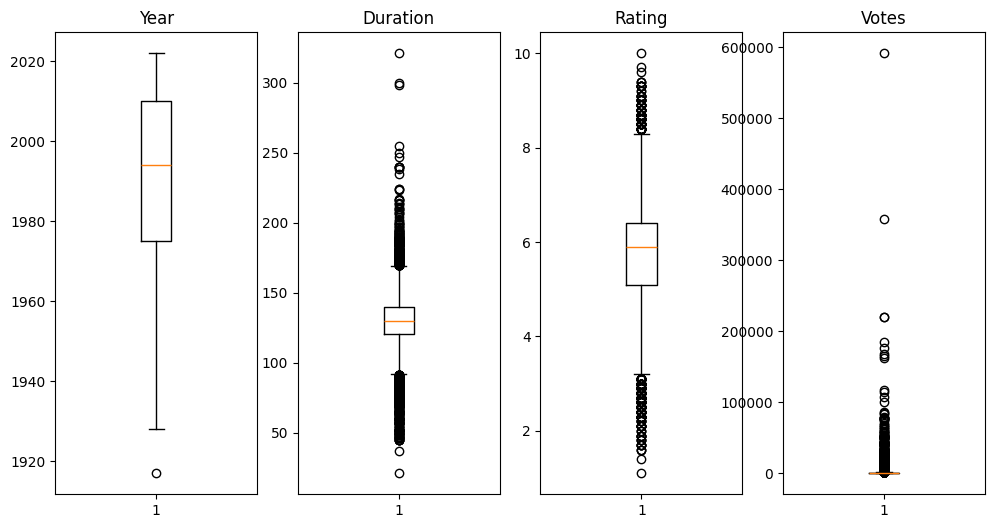

In [74]:
import matplotlib.pyplot as plt
numerical_features = ["Year", "Duration", "Rating", "Votes"]
# Create boxplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(12, 6)) # plot boxplot ของ age,avg_glucose_level,bmi ดูการกระจายของข้อมูล
for i, feature in enumerate(numerical_features):
    axes[i].boxplot(India_data_cleaned[feature])
    axes[i].set_title(feature)
plt.show()


In [ ]:
India_data_cleaned[["Year", "Duration", "Rating", "Votes"]].describe()

,Year,Duration,Rating,Votes
count,11646.000000,11646.000000,11646.000000,11646.000000
mean,1990.765488,129.179749,5.804781,1599.731547
std,22.478731,21.331965,1.161363,9699.050759
min,1917.000000,21.000000,1.100000,0.000000
25%,1975.000000,120.500000,5.100000,29.000000
50%,1994.000000,130.000000,5.900000,91.900000
75%,2010.000000,140.000000,6.400000,604.600000
max,2022.000000,321.000000,10.000000,591417.000000


# เริ่มทำ Frequent Pattern Mining

In [75]:
India_data_cleaned

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category,Rating_Quantiles,Votes_Range
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long,Good,0-9999
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium,Excellent,0-9999
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good,0-9999
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium,Poor,0-9999
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era,Medium,Good,0-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979.0,131.0,Action,5.1,44.4,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,New Hollywood,Long,Poor,0-9999
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Blockbuster Era,Long,Average,0-9999
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Blockbuster Era,Long,Poor,0-9999
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Blockbuster Era,Long,Poor,0-9999


In [76]:
# convert categorical variables to numerical using one-hot encoding
cat_vars = ['Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range']  #'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range'
data_encoded = pd.get_dummies(India_data_cleaned, columns=cat_vars)

In [77]:
data_encoded

,Name,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Votes_Range_500000-509999,Votes_Range_510000-519999,Votes_Range_520000-529999,Votes_Range_530000-539999,Votes_Range_540000-549999,Votes_Range_550000-559999,Votes_Range_560000-569999,Votes_Range_570000-579999,Votes_Range_580000-589999,Votes_Range_590000-599999
0,"""space""",2017.0,120.5,6.4,604.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,#Homecoming,2021.0,90.0,6.5,1736.9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019.0,110.0,4.4,35.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,...And Once Again,2010.0,105.0,6.4,604.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979.0,131.0,5.1,44.4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,1989.0,125.0,5.8,44.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15504,Zulm Ko Jala Doonga,1988.0,131.0,4.6,11.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,1999.0,129.0,4.5,655.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


สร้างdummy

In [78]:
data_apri = data_encoded.iloc[:,5:]
data_apri

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Votes_Range_500000-509999,Votes_Range_510000-519999,Votes_Range_520000-529999,Votes_Range_530000-539999,Votes_Range_540000-549999,Votes_Range_550000-559999,Votes_Range_560000-569999,Votes_Range_570000-579999,Votes_Range_580000-589999,Votes_Range_590000-599999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15504,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
apriori(data_apri, min_support=0.05, use_colnames=True)

<generator object apriori at 0x7f859caf0040>

In [ ]:
data_apri.columns

Index(['Genre_Action', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror',
       ...
       'Votes_Range_500000-509999', 'Votes_Range_510000-519999',
       'Votes_Range_520000-529999', 'Votes_Range_530000-539999',
       'Votes_Range_540000-549999', 'Votes_Range_550000-559999',
       'Votes_Range_560000-569999', 'Votes_Range_570000-579999',
       'Votes_Range_580000-589999', 'Votes_Range_590000-599999'],
      dtype='object', length=18286)

## ผู้กำกับคนไหน ชอบทำหนังประเภทไหน และได้ rating เท่าไหร่

In [ ]:
[col for col in data_apri.columns if col.startswith('Director')][:10]

['Director_A B Arjun',
 'Director_A. Bhimsingh',
 'Director_A. Habib',
 'Director_A. Jagannathan',
 'Director_A. Karim',
 'Director_A. Kodandarami Reddy',
 'Director_A. Majid',
 'Director_A. Muthu',
 'Director_A. Raja',
 'Director_A. Rashid']

In [ ]:
[col for col in data_apri.columns if col.startswith('Genre')][:10]

['Genre_Action',
 'Genre_Action, Adventure',
 'Genre_Action, Adventure, Biography',
 'Genre_Action, Adventure, Comedy',
 'Genre_Action, Adventure, Crime',
 'Genre_Action, Adventure, Drama',
 'Genre_Action, Adventure, Family',
 'Genre_Action, Adventure, Fantasy',
 'Genre_Action, Adventure, History',
 'Genre_Action, Adventure, Horror']

In [ ]:
[col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

['Rating_Quantiles_Poor',
 'Rating_Quantiles_Below Average',
 'Rating_Quantiles_Average',
 'Rating_Quantiles_Good',
 'Rating_Quantiles_Excellent']

#เลือกเฉพาะ columns ที่สนใจ

In [ ]:
selected_columns = [col for col in data_apri.columns if col.startswith('Director')] + \
                    [col for col in data_apri.columns if col.startswith('Genre')] + \
                    [col for col in data_apri.columns if col.startswith('Rating_Quantiles')]


In [ ]:
len(selected_columns)

5206

In [ ]:
data_selected = data_apri[selected_columns]
data_selected.shape

(11646, 5206)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.001

# คำนวณ frequent itemsets
frequentItemsets_Streaming = apriori(data_selected, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Streaming, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
# for index, rule in rules.iterrows():
#     print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
#           f"support={rule['support']}, "
#           f"confidence={rule['confidence']}, "
#           f"lift={rule['lift']})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
print("Deprecation wraning will now be ignored for the current session.")

Deprecation wraning will now be ignored for the current session.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Poor),(Director_Ajay Kashyap),0.273313,0.001374,0.001116,0.004084,2.972785,1.0,0.000741,1.002721,0.913206,0.004080,0.002714,0.408292
1,(Director_Ajay Kashyap),(Rating_Quantiles_Poor),0.001374,0.273313,0.001116,0.812500,2.972785,1.0,0.000741,3.875665,0.664528,0.004080,0.741980,0.408292
2,(Rating_Quantiles_Excellent),(Director_B.R. Chopra),0.183840,0.001460,0.001030,0.005605,3.839657,1.0,0.000762,1.004168,0.906146,0.005592,0.004151,0.355744
3,(Director_B.R. Chopra),(Rating_Quantiles_Excellent),0.001460,0.183840,0.001030,0.705882,3.839657,1.0,0.000762,2.774944,0.740641,0.005592,0.639632,0.355744
4,(Genre_Drama),(Director_B.R. Ishara),0.194402,0.003435,0.001374,0.007067,2.057597,1.0,0.000706,1.003658,0.638030,0.006993,0.003645,0.203534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,"(Director_B.R. Ishara, Genre_Drama)",(Rating_Quantiles_Good),0.001374,0.179547,0.001202,0.875000,4.873386,1.0,0.000955,6.563627,0.795897,0.006689,0.847645,0.440848
272,"(Rating_Quantiles_Good, Director_B.R. Ishara)",(Genre_Drama),0.001460,0.194402,0.001202,0.823529,4.236229,1.0,0.000918,4.565058,0.765058,0.006176,0.780945,0.414857
273,(Genre_Drama),"(Rating_Quantiles_Good, Director_B.R. Ishara)",0.194402,0.001460,0.001202,0.006184,4.236229,1.0,0.000918,1.004753,0.948290,0.006176,0.004731,0.414857
274,(Rating_Quantiles_Good),"(Director_B.R. Ishara, Genre_Drama)",0.179547,0.001374,0.001202,0.006695,4.873386,1.0,0.000955,1.005357,0.968737,0.006689,0.005329,0.440848


## ผู้กำกับคนไหน กำกับหนังได้เยอะสุด และได้ rating เท่าไหร่


In [ ]:
director_counts = India_data_cleaned['Director'].value_counts()
display(director_counts.head())

,count
Director,
Kanti Shah,50
Mahesh Bhatt,46
David Dhawan,43
Babubhai Mistry,42
Hrishikesh Mukherjee,42


### แยกตามแต่ละยุค พิจารณา Rating_Quantiles_Excellent

##### Era_Silent

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Silent = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Silent.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Silent Era,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Silent.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Silent, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.231839,(Rating_Quantiles_Average)
9,0.179547,(Rating_Quantiles_Good)


In [ ]:
frequentItemsets_Silent =  apriori(data_apri_Era_Silent, min_support=0.03, use_colnames=True)
frequentItemsets_Silent

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.231839,(Rating_Quantiles_Average)
9,0.179547,(Rating_Quantiles_Good)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Silent = apriori(data_apri_Era_Silent, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Silent, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
print(rules_Genre)

                    antecedents    consequents  antecedent support  \
0       (Rating_Quantiles_Good)  (Genre_Drama)            0.179547   
2  (Rating_Quantiles_Excellent)  (Genre_Drama)            0.183840   

   consequent support   support  confidence      lift  representativity  \
0            0.194402  0.111111    0.618843  3.183322               1.0   
2            0.194402  0.038897    0.211583  1.088383               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.076207    2.113559       0.835956  0.422738   0.526864    0.595199  
2  0.003159    1.021793       0.099498  0.114626   0.021328    0.205836  


In [ ]:
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:

# # Build association rules
# frequent_itemsets = apriori(tdata, min_support=0.01, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

##### Era_Early

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    # 'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Early = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Early.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Early Sound Era,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Early.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Early, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.231839,(Rating_Quantiles_Average)
9,0.179547,(Rating_Quantiles_Good)


In [ ]:
frequentItemsets_Early =  apriori(data_apri_Era_Early, min_support=0.03, use_colnames=True)
frequentItemsets_Early

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.231839,(Rating_Quantiles_Average)
9,0.179547,(Rating_Quantiles_Good)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Early = apriori(data_apri_Era_Early, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Early, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:

# # Build association rules
# frequent_itemsets = apriori(tdata, min_support=0.01, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

##### Era_Golden

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    # 'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Golden = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Golden.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Golden Age of Hollywood,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Golden.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Golden, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.102868,(Era_Golden Age of Hollywood)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
frequentItemsets_Golden =  apriori(data_apri_Era_Golden, min_support=0.03, use_colnames=True)
frequentItemsets_Golden

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.102868,(Era_Golden Age of Hollywood)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Golden = apriori(data_apri_Era_Golden, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Golden, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Rating_Quantiles_Average'}) + frozenset({'Era_Golden Age of Hollywood'}), support=0.03245749613601236, confidence=0.13999999999999999, lift=1.3609682804674457)
RelationRecord(items=frozenset({'Era_Golden Age of Hollywood'}) + frozenset({'Rating_Quantiles_Average'})

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836
4,(Rating_Quantiles_Average),(Era_Golden Age of Hollywood),0.231839,0.102868,0.032457,0.140000,1.360968,1.0,0.008609,1.043177,0.345278,0.107386,0.041390,0.227763
5,(Era_Golden Age of Hollywood),(Rating_Quantiles_Average),0.102868,0.231839,0.032457,0.315526,1.360968,1.0,0.008609,1.122264,0.295641,0.107386,0.108944,0.227763


##### Era_Hollywood

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    # 'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Hollywood = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Hollywood.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_New Hollywood,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Hollywood.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Hollywood, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.173278,(Era_New Hollywood)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
frequentItemsets_Hollywood =  apriori(data_apri_Era_Hollywood, min_support=0.03, use_colnames=True)
frequentItemsets_Hollywood

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.173278,(Era_New Hollywood)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Hollywood = apriori(data_apri_Era_Hollywood, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Hollywood, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Era_New Hollywood'}) + frozenset({'Rating_Quantiles_Average'}), support=0.04576678687961532, confidence=0.26412289395441035, lift=1.1392500825900234)
RelationRecord(items=frozenset({'Rating_Quantiles_Average'}) + frozenset({'Era_New Hollywood'}), support=0.04576678

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836
4,(Era_New Hollywood),(Rating_Quantiles_Average),0.173278,0.231839,0.045767,0.264123,1.139250,1.0,0.005594,1.043871,0.147849,0.127360,0.042027,0.230765
5,(Rating_Quantiles_Average),(Era_New Hollywood),0.231839,0.173278,0.045767,0.197407,1.139250,1.0,0.005594,1.030064,0.159120,0.127360,0.029186,0.230765
6,(Era_New Hollywood),(Rating_Quantiles_Good),0.173278,0.179547,0.042075,0.242815,1.352377,1.0,0.010963,1.083557,0.315174,0.135397,0.077114,0.238576
7,(Rating_Quantiles_Good),(Era_New Hollywood),0.179547,0.173278,0.042075,0.234338,1.352377,1.0,0.010963,1.079747,0.317582,0.135397,0.073857,0.238576
8,(Era_New Hollywood),(Rating_Quantiles_Excellent),0.173278,0.183840,0.043448,0.250743,1.363922,1.0,0.011593,1.089293,0.322745,0.138516,0.081973,0.243541
9,(Rating_Quantiles_Excellent),(Era_New Hollywood),0.183840,0.173278,0.043448,0.236338,1.363922,1.0,0.011593,1.082576,0.326921,0.138516,0.076277,0.243541


##### Era_Blockbuster

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    # 'Era_Blockbuster Era',
    'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Blockbuster = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Blockbuster.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Blockbuster Era,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Blockbuster.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Blockbuster, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.279581,(Era_Blockbuster Era)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
frequentItemsets_Blockbuster =  apriori(data_apri_Era_Blockbuster, min_support=0.03, use_colnames=True)
frequentItemsets_Blockbuster

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.279581,(Era_Blockbuster Era)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Blockbuster = apriori(data_apri_Era_Blockbuster, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Blockbuster, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Genre_Action'}) + frozenset({'Era_Blockbuster Era'}), support=0.03872574274428989, confidence=0.4357487922705314, lift=1.5585781433607524)
RelationRecord(items=frozenset({'Era_Blockbuster Era'}) + frozenset({'Genre_Action'}), support=0.03872574274428989, confidence=0.13851351351351354, lift=1.5585781433607524)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Era_Blockbuster Era),(Genre_Action),0.279581,0.088872,0.038726,0.138514,1.558578,1.0,0.013879,1.057623,0.497474,0.117448,0.054484,0.287131
2,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
4,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
7,"(Era_Blockbuster Era, Rating_Quantiles_Good)",(Genre_Drama),0.047312,0.194402,0.031599,0.667877,3.435552,1.0,0.022401,2.425600,0.744133,0.150388,0.587731,0.415210
9,(Era_Blockbuster Era),"(Rating_Quantiles_Good, Genre_Drama)",0.279581,0.111111,0.031599,0.113022,1.017199,1.0,0.000534,1.002155,0.023470,0.087996,0.002150,0.198706
11,(Rating_Quantiles_Good),"(Era_Blockbuster Era, Genre_Drama)",0.179547,0.054268,0.031599,0.175992,3.243049,1.0,0.021855,1.147723,0.843007,0.156263,0.128710,0.379135


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Genre_Action),(Era_Blockbuster Era),0.088872,0.279581,0.038726,0.435749,1.558578,1.0,0.013879,1.276770,0.393347,0.117448,0.216774,0.287131
3,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
5,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836
6,"(Era_Blockbuster Era, Genre_Drama)",(Rating_Quantiles_Good),0.054268,0.179547,0.031599,0.582278,3.243049,1.0,0.021855,1.964116,0.731336,0.156263,0.490865,0.379135
8,"(Rating_Quantiles_Good, Genre_Drama)",(Era_Blockbuster Era),0.111111,0.279581,0.031599,0.284389,1.017199,1.0,0.000534,1.006719,0.019022,0.087996,0.006675,0.198706
10,(Genre_Drama),"(Era_Blockbuster Era, Rating_Quantiles_Good)",0.194402,0.047312,0.031599,0.162544,3.435552,1.0,0.022401,1.137597,0.879999,0.150388,0.120954,0.415210


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


In [ ]:
# กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
rules_Genre = rules[
    (rules["consequents"].astype(str).str.contains("Genre")) &
    (rules["antecedents"].astype(str).str.contains("Rating"))
]

# แสดงผลลัพธ์ที่กรองแล้ว
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
4,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
7,"(Era_Blockbuster Era, Rating_Quantiles_Good)",(Genre_Drama),0.047312,0.194402,0.031599,0.667877,3.435552,1.0,0.022401,2.425600,0.744133,0.150388,0.587731,0.415210
11,(Rating_Quantiles_Good),"(Era_Blockbuster Era, Genre_Drama)",0.179547,0.054268,0.031599,0.175992,3.243049,1.0,0.021855,1.147723,0.843007,0.156263,0.128710,0.379135


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Genre_Action),(Era_Blockbuster Era),0.088872,0.279581,0.038726,0.435749,1.558578,1.0,0.013879,1.276770,0.393347,0.117448,0.216774,0.287131
1,(Era_Blockbuster Era),(Genre_Action),0.279581,0.088872,0.038726,0.138514,1.558578,1.0,0.013879,1.057623,0.497474,0.117448,0.054484,0.287131
2,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
3,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
4,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
5,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836
6,"(Era_Blockbuster Era, Genre_Drama)",(Rating_Quantiles_Good),0.054268,0.179547,0.031599,0.582278,3.243049,1.0,0.021855,1.964116,0.731336,0.156263,0.490865,0.379135
7,"(Era_Blockbuster Era, Rating_Quantiles_Good)",(Genre_Drama),0.047312,0.194402,0.031599,0.667877,3.435552,1.0,0.022401,2.425600,0.744133,0.150388,0.587731,0.415210
8,"(Rating_Quantiles_Good, Genre_Drama)",(Era_Blockbuster Era),0.111111,0.279581,0.031599,0.284389,1.017199,1.0,0.000534,1.006719,0.019022,0.087996,0.006675,0.198706
9,(Era_Blockbuster Era),"(Rating_Quantiles_Good, Genre_Drama)",0.279581,0.111111,0.031599,0.113022,1.017199,1.0,0.000534,1.002155,0.023470,0.087996,0.002150,0.198706


##### Era_Internet

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    # 'Era_Internet Age',
    'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Internet = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Internet.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Internet Age,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data_apri_Era_Internet.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Internet, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.165722,(Era_Internet Age)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
frequentItemsets_Internet =  apriori(data_apri_Era_Internet, min_support=0.03, use_colnames=True)
frequentItemsets_Internet

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.165722,(Era_Internet Age)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Internet = apriori(data_apri_Era_Internet, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Internet, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.20008833922261485, lift=1.0883833715957836)


In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
1,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
2,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
3,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre

##### Era_Streaming

In [ ]:
# คอลัมน์ที่คุณไม่ต้องการ
columns_to_remove = [
    'Era_Silent Era',
    'Era_Early Sound Era',
    'Era_Golden Age of Hollywood',
    'Era_New Hollywood',
    'Era_Blockbuster Era',
    'Era_Internet Age',
    # 'Era_Streaming Era',
    'Rating_Quantiles_Poor',
    'Rating_Quantiles_Below Average',
    # 'Rating_Quantiles_Average',
    # 'Rating_Quantiles_Good',
    # 'Rating_Quantiles_Excellent',
    'Votes_Range_0-9999',
    'Votes_Range_10000-19999',
    'Votes_Range_20000-29999',
    'Votes_Range_30000-39999',
    'Votes_Range_40000-49999',
    'Votes_Range_50000-59999',
    'Votes_Range_60000-69999',
    'Votes_Range_70000-79999',
    'Votes_Range_80000-89999',
    'Votes_Range_90000-99999',
    'Votes_Range_100000-109999',
    'Votes_Range_110000-119999',
    'Votes_Range_120000-129999',
    'Votes_Range_130000-139999',
    'Votes_Range_140000-149999',
    'Votes_Range_150000-159999',
    'Votes_Range_160000-169999',
    'Votes_Range_170000-179999',
    'Votes_Range_180000-189999',
    'Votes_Range_190000-199999',
    'Votes_Range_200000-209999',
    'Votes_Range_210000-219999',
    'Votes_Range_220000-229999',
    'Votes_Range_230000-239999',
    'Votes_Range_240000-249999',
    'Votes_Range_250000-259999',
    'Votes_Range_260000-269999',
    'Votes_Range_270000-279999',
    'Votes_Range_280000-289999',
    'Votes_Range_290000-299999',
    'Votes_Range_300000-309999',
    'Votes_Range_310000-319999',
    'Votes_Range_320000-329999',
    'Votes_Range_330000-339999',
    'Votes_Range_340000-349999',
    'Votes_Range_350000-359999',
    'Votes_Range_360000-369999',
    'Votes_Range_370000-379999',
    'Votes_Range_380000-389999',
    'Votes_Range_390000-399999',
    'Votes_Range_400000-409999',
    'Votes_Range_410000-419999',
    'Votes_Range_420000-429999',
    'Votes_Range_430000-439999',
    'Votes_Range_440000-449999',
    'Votes_Range_450000-459999',
    'Votes_Range_460000-469999',
    'Votes_Range_470000-479999',
    'Votes_Range_480000-489999',
    'Votes_Range_490000-499999',
    'Votes_Range_500000-509999',
    'Votes_Range_510000-519999',
    'Votes_Range_520000-529999',
    'Votes_Range_530000-539999',
    'Votes_Range_540000-549999',
    'Votes_Range_550000-559999',
    'Votes_Range_560000-569999',
    'Votes_Range_570000-579999',
    'Votes_Range_580000-589999',
    'Votes_Range_590000-599999',
    'Duration_Category_Short',
    'Duration_Category_Medium',
    'Duration_Category_Long',
    'Duration_Category_Epic'
    ]

# ลบคอลัมน์ที่ไม่ต้องการออกจาก DataFrame
data_apri_Era_Streaming = data_apri.drop(columns=columns_to_remove)
data_apri_Era_Streaming.head(5)

,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon,Era_Streaming Era,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
data_apri_Era_Streaming.shape

(11646, 18214)

In [ ]:
apriori(data_apri_Era_Streaming, min_support=0.03, use_colnames=True)

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.261807,(Era_Streaming Era)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
frequentItemsets_Streaming =  apriori(data_apri_Era_Streaming, min_support=0.03, use_colnames=True)
frequentItemsets_Streaming

,support,itemsets
0,0.088872,(Genre_Action)
1,0.039842,"(Genre_Action, Crime, Drama)"
2,0.037180,(Genre_Comedy)
3,0.194402,(Genre_Drama)
4,0.036321,"(Genre_Drama, Family)"
5,0.044994,"(Genre_Drama, Romance)"
6,0.045423,(Genre_Romance)
7,0.037695,(Genre_Thriller)
8,0.261807,(Era_Streaming Era)
9,0.231839,(Rating_Quantiles_Average)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.03

# คำนวณ frequent itemsets
frequentItemsets_Streaming = apriori(data_apri_Era_Streaming, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_Streaming, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Era_Streaming Era'}) + frozenset({'Genre_Drama'}), support=0.05632835308260347, confidence=0.2151525090193506, lift=1.1067429858831082)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Era_Streaming Era'}), support=0.05632835308260347, confidence=0.28975265017667845, lift=1.1067429858831082)
RelationRecord(items=frozenset({'Rating_Quantiles_Good'}) + frozenset({'Genre_Drama'}), support=0.1111111111111111, confidence=0.6188426590148254, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Good'}), support=0.1111111111111111, confidence=0.5715547703180212, lift=3.1833222645259083)
RelationRecord(items=frozenset({'Rating_Quantiles_Excellent'}) + frozenset({'Genre_Drama'}), support=0.03889747552807831, confidence=0.21158337225595517, lift=1.0883833715957836)
RelationRecord(items=frozenset({'Genre_Drama'}) + frozenset({'Rating_Quantiles_Excellent'}), support=0.03889747552807831, confidence=0.200

In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Era_Streaming Era),(Genre_Drama),0.261807,0.194402,0.056328,0.215153,1.106743,1.0,0.005433,1.026440,0.130654,0.140863,0.025758,0.252453
2,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
4,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836


In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Genre")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Genre_Drama),(Era_Streaming Era),0.194402,0.261807,0.056328,0.289753,1.106743,1.0,0.005433,1.039347,0.119722,0.140863,0.037857,0.252453
3,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
5,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Era_Streaming Era),(Genre_Drama),0.261807,0.194402,0.056328,0.215153,1.106743,1.0,0.005433,1.026440,0.130654,0.140863,0.025758,0.252453
1,(Genre_Drama),(Era_Streaming Era),0.194402,0.261807,0.056328,0.289753,1.106743,1.0,0.005433,1.039347,0.119722,0.140863,0.037857,0.252453
2,(Rating_Quantiles_Good),(Genre_Drama),0.179547,0.194402,0.111111,0.618843,3.183322,1.0,0.076207,2.113559,0.835956,0.422738,0.526864,0.595199
3,(Genre_Drama),(Rating_Quantiles_Good),0.194402,0.179547,0.111111,0.571555,3.183322,1.0,0.076207,1.914955,0.851370,0.422738,0.477795,0.595199
4,(Rating_Quantiles_Excellent),(Genre_Drama),0.183840,0.194402,0.038897,0.211583,1.088383,1.0,0.003159,1.021793,0.099498,0.114626,0.021328,0.205836
5,(Genre_Drama),(Rating_Quantiles_Excellent),0.194402,0.183840,0.038897,0.200088,1.088383,1.0,0.003159,1.020313,0.100802,0.114626,0.019908,0.205836
6,(Era_Streaming Era),(Rating_Quantiles_Excellent),0.261807,0.183840,0.060708,0.231879,1.261311,1.0,0.012577,1.062541,0.280650,0.157707,0.058860,0.281049
7,(Rating_Quantiles_Excellent),(Era_Streaming Era),0.183840,0.261807,0.060708,0.330220,1.261311,1.0,0.012577,1.102142,0.253840,0.157707,0.092676,0.281049


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre

### Director actor

In [ ]:
# convert categorical variables to numerical using one-hot encoding
da = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']  #'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range'
data_da = pd.get_dummies(India_data_cleaned, columns=da)

In [ ]:
data_da

,Name,Year,Duration,Genre,Rating,Votes,Era,Duration_Category,Rating_Quantiles,Votes_Range,...,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon
0,"""space""",2017.0,120.5,Drama,6.4,604.6,Streaming Era,Long,Good,0-9999,...,False,False,False,False,False,False,False,False,False,False
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Streaming Era,Medium,Excellent,0-9999,...,False,False,False,False,False,False,False,False,False,False
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Streaming Era,Medium,Good,0-9999,...,False,False,False,False,False,False,False,False,False,False
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Streaming Era,Medium,Poor,0-9999,...,False,False,False,False,False,False,False,False,False,False
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Streaming Era,Medium,Good,0-9999,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979.0,131.0,Action,5.1,44.4,New Hollywood,Long,Poor,0-9999,...,False,False,False,False,False,False,False,False,False,False
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,Blockbuster Era,Long,Average,0-9999,...,False,False,False,False,False,False,False,False,False,False
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11.0,Blockbuster Era,Long,Poor,0-9999,...,False,False,False,False,False,False,False,False,False,False
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Blockbuster Era,Long,Poor,0-9999,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_da_apri = data_da.iloc[:,10:]
data_da_apri

,Director_A B Arjun,Director_A. Bhimsingh,Director_A. Habib,Director_A. Jagannathan,Director_A. Karim,Director_A. Kodandarami Reddy,Director_A. Majid,Director_A. Muthu,Director_A. Raja,Director_A. Rashid,...,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15504,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
apriori(data_da_apri, min_support=0.005, use_colnames=True)

,support,itemsets
0,0.006182,(Actor 1_Ajay Devgn)
1,0.007470,(Actor 1_Akshay Kumar)
2,0.010562,(Actor 1_Amitabh Bachchan)
3,0.012880,(Actor 1_Ashok Kumar)
4,0.007728,(Actor 1_Dev Anand)
5,0.012021,(Actor 1_Dharmendra)
6,0.005839,(Actor 1_Govinda)
7,0.012021,(Actor 1_Jeetendra)
8,0.011420,(Actor 1_Mithun Chakraborty)
9,0.010218,(Actor 1_Rajesh Khanna)


In [ ]:
frequentItemsets_da =  apriori(data_da_apri, min_support=0.001, use_colnames=True)
frequentItemsets_da

,support,itemsets
0,0.001460,(Director_A. Bhimsingh)
1,0.001030,(Director_A. Salaam)
2,0.001717,(Director_A. Shamsheer)
3,0.001717,(Director_Abbas Alibhai Burmawalla)
4,0.002061,(Director_Abdul Rashid Kardar)
...,...,...
689,0.001803,"(Director_Shyam Ramsay, Actor 1_Tulsi Ramsay)"
690,0.001202,"(Director_T.L.V. Prasad, Actor 1_Mithun Chakra..."
691,0.001374,"(Actor 1_Dharmendra, Actor 2_Hema Malini)"
692,0.001288,"(Actor 2_Jaya Prada, Actor 1_Jeetendra)"


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.001

# คำนวณ frequent itemsets
frequentItemsets_da = apriori(data_da_apri, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets_da, metric="lift", min_threshold=1)

# แสดงกฎเชื่อมโยง
for index, rule in rules.iterrows():
    print(f"RelationRecord(items={rule['antecedents']} + {rule['consequents']}, "
          f"support={rule['support']}, "
          f"confidence={rule['confidence']}, "
          f"lift={rule['lift']})")

RelationRecord(items=frozenset({'Actor 1_Mastan Alibhai Burmawalla'}) + frozenset({'Director_Abbas Alibhai Burmawalla'}), support=0.001717327837884252, confidence=1.0, lift=582.3000000000001)
RelationRecord(items=frozenset({'Director_Abbas Alibhai Burmawalla'}) + frozenset({'Actor 1_Mastan Alibhai Burmawalla'}), support=0.001717327837884252, confidence=1.0, lift=582.3000000000001)
RelationRecord(items=frozenset({'Actor 1_Dev Anand'}) + frozenset({'Director_Dev Anand'}), support=0.001287995878413189, confidence=0.16666666666666666, lift=102.1578947368421)
RelationRecord(items=frozenset({'Director_Dev Anand'}) + frozenset({'Actor 1_Dev Anand'}), support=0.001287995878413189, confidence=0.7894736842105263, lift=102.15789473684211)
RelationRecord(items=frozenset({'Director_Kanti Shah'}) + frozenset({'Actor 1_Sapna Sappu'}), support=0.0010303967027305513, confidence=0.24000000000000002, lift=147.10736842105266)
RelationRecord(items=frozenset({'Actor 1_Sapna Sappu'}) + frozenset({'Director_K

In [ ]:
# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["antecedents"].astype(str).str.contains("Directo")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Director_Abbas Alibhai Burmawalla),(Actor 1_Mastan Alibhai Burmawalla),0.001717,0.001717,0.001717,1.000000,582.300000,1.0,0.001714,inf,1.000000,1.000000,1.000000,1.000000
3,(Director_Dev Anand),(Actor 1_Dev Anand),0.001631,0.007728,0.001288,0.789474,102.157895,1.0,0.001275,4.713292,0.991829,0.159574,0.787834,0.478070
4,(Director_Kanti Shah),(Actor 1_Sapna Sappu),0.004293,0.001631,0.001030,0.240000,147.107368,1.0,0.001023,1.313643,0.997485,0.210526,0.238758,0.435789
6,(Director_Shyam Ramsay),(Actor 1_Tulsi Ramsay),0.002147,0.001803,0.001803,0.840000,465.840000,1.0,0.001799,6.238730,1.000000,0.840000,0.839711,0.920000
8,(Director_T.L.V. Prasad),(Actor 1_Mithun Chakraborty),0.002576,0.011420,0.001202,0.466667,40.863158,1.0,0.001173,1.853587,0.978048,0.093960,0.460506,0.285965


In [ ]:

# filter rules to show only consequents with "stroke_1"
rules_Genre = rules[rules["consequents"].astype(str).str.contains("Directo")]

# print the resulting rules
rules_Genre

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Actor 1_Mastan Alibhai Burmawalla),(Director_Abbas Alibhai Burmawalla),0.001717,0.001717,0.001717,1.000000,582.300000,1.0,0.001714,inf,1.000000,1.000000,1.000000,1.000000
2,(Actor 1_Dev Anand),(Director_Dev Anand),0.007728,0.001631,0.001288,0.166667,102.157895,1.0,0.001275,1.198042,0.997923,0.159574,0.165305,0.478070
5,(Actor 1_Sapna Sappu),(Director_Kanti Shah),0.001631,0.004293,0.001030,0.631579,147.107368,1.0,0.001023,2.702632,0.994825,0.210526,0.629990,0.435789
7,(Actor 1_Tulsi Ramsay),(Director_Shyam Ramsay),0.001803,0.002147,0.001803,1.000000,465.840000,1.0,0.001799,inf,0.999656,0.840000,1.000000,0.920000
9,(Actor 1_Mithun Chakraborty),(Director_T.L.V. Prasad),0.011420,0.002576,0.001202,0.105263,40.863158,1.0,0.001173,1.114768,0.986798,0.093960,0.102952,0.285965


In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Actor 1_Mastan Alibhai Burmawalla),(Director_Abbas Alibhai Burmawalla),0.001717,0.001717,0.001717,1.000000,582.300000,1.0,0.001714,inf,1.000000,1.000000,1.000000,1.000000
1,(Director_Abbas Alibhai Burmawalla),(Actor 1_Mastan Alibhai Burmawalla),0.001717,0.001717,0.001717,1.000000,582.300000,1.0,0.001714,inf,1.000000,1.000000,1.000000,1.000000
2,(Actor 1_Dev Anand),(Director_Dev Anand),0.007728,0.001631,0.001288,0.166667,102.157895,1.0,0.001275,1.198042,0.997923,0.159574,0.165305,0.478070
3,(Director_Dev Anand),(Actor 1_Dev Anand),0.001631,0.007728,0.001288,0.789474,102.157895,1.0,0.001275,4.713292,0.991829,0.159574,0.787834,0.478070
4,(Director_Kanti Shah),(Actor 1_Sapna Sappu),0.004293,0.001631,0.001030,0.240000,147.107368,1.0,0.001023,1.313643,0.997485,0.210526,0.238758,0.435789
5,(Actor 1_Sapna Sappu),(Director_Kanti Shah),0.001631,0.004293,0.001030,0.631579,147.107368,1.0,0.001023,2.702632,0.994825,0.210526,0.629990,0.435789
6,(Director_Shyam Ramsay),(Actor 1_Tulsi Ramsay),0.002147,0.001803,0.001803,0.840000,465.840000,1.0,0.001799,6.238730,1.000000,0.840000,0.839711,0.920000
7,(Actor 1_Tulsi Ramsay),(Director_Shyam Ramsay),0.001803,0.002147,0.001803,1.000000,465.840000,1.0,0.001799,inf,0.999656,0.840000,1.000000,0.920000
8,(Director_T.L.V. Prasad),(Actor 1_Mithun Chakraborty),0.002576,0.011420,0.001202,0.466667,40.863158,1.0,0.001173,1.853587,0.978048,0.093960,0.460506,0.285965
9,(Actor 1_Mithun Chakraborty),(Director_T.L.V. Prasad),0.011420,0.002576,0.001202,0.105263,40.863158,1.0,0.001173,1.114768,0.986798,0.093960,0.102952,0.285965


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["antecedents"].astype(str).str.contains("Genre")) &
#     (rules["consequents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre


In [ ]:
# # กรองกฎเชื่อมโยงที่ antecedents มีคำว่า "Genre"
# rules_Genre = rules[
#     (rules["consequents"].astype(str).str.contains("Genre")) &
#     (rules["antecedents"].astype(str).str.contains("Rating"))
# ]

# # แสดงผลลัพธ์ที่กรองแล้ว
# rules_Genre

#HW4  Frequent Pattern Mining

In [79]:
India_data_cleaned

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category,Rating_Quantiles,Votes_Range
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long,Good,0-9999
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium,Excellent,0-9999
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good,0-9999
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium,Poor,0-9999
4,...And Once Again,2010.0,105.0,Drama,6.4,604.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Streaming Era,Medium,Good,0-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979.0,131.0,Action,5.1,44.4,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha,New Hollywood,Long,Poor,0-9999
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Blockbuster Era,Long,Average,0-9999
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Blockbuster Era,Long,Poor,0-9999
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Blockbuster Era,Long,Poor,0-9999


In [80]:
import pandas as pd
# แยกเเนวหนัง โดยการ split ด้วยเครื่องหมาย ', '
India_data_exploded = India_data_cleaned.copy()
India_data_exploded['Genre'] = India_data_exploded['Genre'].str.split(', ')
# ใช้ explode เพื่อกระจาย list ในคอลัมน์ Genre ออกเป็นแถวใหม่
India_data_exploded = India_data_exploded.explode('Genre')
# รีเซ็ต index เพื่อให้ข้อมูลเรียงลำดับใหม่
India_data_exploded = India_data_exploded.reset_index(drop=True)
# แสดงผลลัพธ์
India_data_exploded

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Era,Duration_Category,Rating_Quantiles,Votes_Range
0,"""space""",2017.0,120.5,Drama,6.4,604.6,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Streaming Era,Long,Good,0-9999
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Streaming Era,Medium,Excellent,0-9999
2,#Homecoming,2021.0,90.0,Drama,6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good,0-9999
3,#Homecoming,2021.0,90.0,Musical,6.5,1736.9,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Streaming Era,Medium,Good,0-9999
4,#Yaaram,2019.0,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Streaming Era,Medium,Poor,0-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20903,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Blockbuster Era,Long,Poor,0-9999
20904,Zulmi,1999.0,129.0,Action,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Blockbuster Era,Long,Poor,0-9999
20905,Zulmi,1999.0,129.0,Drama,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Blockbuster Era,Long,Poor,0-9999
20906,Zulm-O-Sitam,1998.0,130.0,Action,6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,Blockbuster Era,Long,Average,0-9999


In [81]:
# convert categorical variables to numerical using one-hot encoding
cat_vars = ['Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range']  #'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Era', 'Duration_Category','Rating_Quantiles', 'Votes_Range'
data_encoded = pd.get_dummies(India_data_exploded, columns=cat_vars)

In [82]:
data_encoded

,Name,Year,Duration,Rating,Votes,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Votes_Range_500000-509999,Votes_Range_510000-519999,Votes_Range_520000-529999,Votes_Range_530000-539999,Votes_Range_540000-549999,Votes_Range_550000-559999,Votes_Range_560000-569999,Votes_Range_570000-579999,Votes_Range_580000-589999,Votes_Range_590000-599999
0,"""space""",2017.0,120.5,6.4,604.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,#Homecoming,2021.0,90.0,6.5,1736.9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,#Homecoming,2021.0,90.0,6.5,1736.9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,#Yaaram,2019.0,110.0,4.4,35.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20903,Zulm Ko Jala Doonga,1988.0,131.0,4.6,11.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20904,Zulmi,1999.0,129.0,4.5,655.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20905,Zulmi,1999.0,129.0,4.5,655.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20906,Zulm-O-Sitam,1998.0,130.0,6.2,20.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


สร้างdummy

In [83]:
data_apri = data_encoded.iloc[:,5:]
data_apri

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,...,Votes_Range_500000-509999,Votes_Range_510000-519999,Votes_Range_520000-529999,Votes_Range_530000-539999,Votes_Range_540000-549999,Votes_Range_550000-559999,Votes_Range_560000-569999,Votes_Range_570000-579999,Votes_Range_580000-589999,Votes_Range_590000-599999
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20903,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20904,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20905,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
20906,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
from mlxtend.frequent_patterns import apriori
apriori(data_apri, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets
0,0.157404,(Genre_Action)
1,0.092835,(Genre_Comedy)
2,0.062655,(Genre_Crime)
3,0.319925,(Genre_Drama)
4,0.108714,(Genre_Romance)
...,...,...
114,0.061890,"(Duration_Category_Long, Votes_Range_0-9999, G..."
115,0.071073,"(Votes_Range_0-9999, Genre_Drama, Duration_Cat..."
116,0.081596,"(Era_Blockbuster Era, Votes_Range_0-9999, Rati..."
117,0.058399,"(Duration_Category_Long, Votes_Range_0-9999, E..."


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [86]:
data_apri.columns

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Index(['Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Family', 'Genre_Fantasy',
       ...
       'Votes_Range_500000-509999', 'Votes_Range_510000-519999',
       'Votes_Range_520000-529999', 'Votes_Range_530000-539999',
       'Votes_Range_540000-549999', 'Votes_Range_550000-559999',
       'Votes_Range_560000-569999', 'Votes_Range_570000-579999',
       'Votes_Range_580000-589999', 'Votes_Range_590000-599999'],
      dtype='object', length=17855)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## ในแต่ละยุคหนังแต่ละประเภทได้ Rating Quantiles อะไร

In [87]:
[col for col in data_apri.columns if col.startswith('Era')][:10]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['Era_Silent Era',
 'Era_Early Sound Era',
 'Era_Golden Age of Hollywood',
 'Era_New Hollywood',
 'Era_Blockbuster Era',
 'Era_Internet Age',
 'Era_Streaming Era']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [88]:
[col for col in data_apri.columns if col.startswith('Genre')][:10]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['Genre_Action',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Biography',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_Documentary',
 'Genre_Drama',
 'Genre_Family',
 'Genre_Fantasy']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [89]:
[col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

['Rating_Quantiles_Poor',
 'Rating_Quantiles_Below Average',
 'Rating_Quantiles_Average',
 'Rating_Quantiles_Good',
 'Rating_Quantiles_Excellent']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


เลือกตัวแปรที่ใช้

In [90]:
selected_columns = [col for col in data_apri.columns if col.startswith('Era')] + \
                    [col for col in data_apri.columns if col.startswith('Genre')] + \
                     [col for col in data_apri.columns if col.startswith('Rating_Quantiles')]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [91]:
len(selected_columns)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

35

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [92]:
data_selected = data_apri[selected_columns]
data_selected.shape

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(20908, 35)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [93]:
data_selected.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Era_Silent Era,Era_Early Sound Era,Era_Golden Age of Hollywood,Era_New Hollywood,Era_Blockbuster Era,Era_Internet Age,Era_Streaming Era,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Rating_Quantiles_Poor,Rating_Quantiles_Below Average,Rating_Quantiles_Average,Rating_Quantiles_Good,Rating_Quantiles_Excellent
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [94]:
from mlxtend.frequent_patterns import apriori, association_rules

# ค่าที่ตั้งต้น
min_sup = 0.001

# คำนวณ frequent itemsets
frequentItemsets = apriori(data_selected, min_support=min_sup, use_colnames=True)

# สร้างกฎเชื่อมโยง (association rules) จาก frequent itemsets
rules = association_rules(frequentItemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [95]:
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Era_Early Sound Era),(Genre_Action),0.013440,0.157404,0.002296,0.170819,1.085224,1.0,0.000180,1.016178,0.079601,0.013621,0.015921,0.092702
1,(Genre_Action),(Era_Early Sound Era),0.157404,0.013440,0.002296,0.014585,1.085224,1.0,0.000180,1.001162,0.093202,0.013621,0.001161,0.092702
2,(Era_Early Sound Era),(Genre_Adventure),0.013440,0.024393,0.001148,0.085409,3.501444,1.0,0.000820,1.066715,0.724136,0.031291,0.062542,0.066234
3,(Genre_Adventure),(Era_Early Sound Era),0.024393,0.013440,0.001148,0.047059,3.501444,1.0,0.000820,1.035279,0.732265,0.031291,0.034077,0.066234
4,(Era_Early Sound Era),(Genre_Drama),0.013440,0.319925,0.005213,0.387900,1.212471,1.0,0.000914,1.111052,0.177625,0.015887,0.099952,0.202098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,(Genre_Thriller),"(Era_Streaming Era, Rating_Quantiles_Average)",0.064473,0.063564,0.005118,0.079377,1.248767,1.0,0.001019,1.017176,0.212939,0.041634,0.016886,0.079944
794,"(Rating_Quantiles_Good, Genre_Thriller)",(Era_Streaming Era),0.004735,0.263344,0.001435,0.303030,1.150701,1.0,0.000188,1.056941,0.131587,0.005381,0.053873,0.154239
795,(Era_Streaming Era),"(Rating_Quantiles_Good, Genre_Thriller)",0.263344,0.004735,0.001435,0.005449,1.150701,1.0,0.000188,1.000717,0.177782,0.005381,0.000717,0.154239
796,"(Rating_Quantiles_Excellent, Genre_Thriller)",(Era_Streaming Era),0.008513,0.263344,0.004161,0.488764,1.855990,1.0,0.001919,1.440931,0.465164,0.015544,0.306004,0.252282


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


จำนวนหนังแต่ละประเภท

In [96]:
India_data_exploded['Genre'].value_counts()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,count
Genre,
Drama,6689
Action,3291
Romance,2273
Comedy,1941
Thriller,1348
Crime,1310
Family,907
Musical,571
Adventure,510


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


กำหนด antecedents ที่ส่งผลถึง consequents

In [97]:
rules[rules["antecedents"].astype(str).str.contains("Genre") & rules["antecedents"].astype(str).str.contains("Era")]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
170,"(Era_Early Sound Era, Genre_Action)",(Rating_Quantiles_Poor),0.002296,0.271379,0.001387,0.604167,2.226281,1.0,0.000764,1.840726,0.552088,0.005094,0.456736,0.304639
176,"(Era_Early Sound Era, Genre_Drama)",(Rating_Quantiles_Average),0.005213,0.251004,0.001817,0.348624,1.388915,1.0,0.000509,1.149866,0.281481,0.007144,0.130334,0.177932
182,"(Era_Early Sound Era, Genre_Drama)",(Rating_Quantiles_Good),0.005213,0.148890,0.002439,0.467890,3.142513,1.0,0.001663,1.599499,0.685356,0.016083,0.374804,0.242136
188,"(Genre_Action, Era_Golden Age of Hollywood)",(Rating_Quantiles_Poor),0.010522,0.271379,0.005261,0.500000,1.842439,1.0,0.002406,1.457241,0.462104,0.019018,0.313772,0.259693
192,"(Genre_Action, Era_Golden Age of Hollywood)",(Rating_Quantiles_Below Average),0.010522,0.120528,0.001865,0.177273,1.470801,1.0,0.000597,1.068971,0.323502,0.014439,0.064521,0.096374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,"(Genre_Mystery, Era_Streaming Era)",(Rating_Quantiles_Excellent),0.007940,0.208198,0.001722,0.216867,1.041641,1.0,0.000069,1.011070,0.040297,0.008030,0.010949,0.112569
769,"(Genre_Romance, Era_Streaming Era)",(Rating_Quantiles_Poor),0.023627,0.271379,0.007700,0.325911,1.200942,1.0,0.001288,1.080897,0.171369,0.026802,0.074842,0.177143
775,"(Genre_Romance, Era_Streaming Era)",(Rating_Quantiles_Below Average),0.023627,0.120528,0.005165,0.218623,1.813881,1.0,0.002318,1.125542,0.459554,0.037164,0.111539,0.130740
780,"(Era_Streaming Era, Genre_Thriller)",(Rating_Quantiles_Poor),0.024153,0.271379,0.006600,0.273267,1.006957,1.0,0.000046,1.002598,0.007080,0.022844,0.002591,0.148794


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

กำหนดให้มีเฉพาะตัวที่ความแรงของความสัมพันธ์ของ antecedent ที่ช่วยเพิ่มโอกาสเกิด consequents ต้องมากกว่าค่าเฉลี่ย 2.5 เท่า

In [98]:
rules[rules["antecedents"].astype(str).str.contains("Genre") &
      rules["antecedents"].astype(str).str.contains("Era") &
      (rules["lift"] > 2.5)]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
182,"(Era_Early Sound Era, Genre_Drama)",(Rating_Quantiles_Good),0.005213,0.148890,0.002439,0.467890,3.142513,1.0,0.001663,1.599499,0.685356,0.016083,0.374804,0.242136
228,"(Genre_Family, Era_Golden Age of Hollywood)",(Rating_Quantiles_Average),0.008466,0.251004,0.005500,0.649718,2.588471,1.0,0.003375,2.138262,0.618911,0.021657,0.532330,0.335815
240,"(Genre_Fantasy, Era_Golden Age of Hollywood)",(Rating_Quantiles_Average),0.005452,0.251004,0.003635,0.666667,2.655996,1.0,0.002266,2.246987,0.626912,0.014378,0.554960,0.340574
375,"(Era_New Hollywood, Genre_History)",(Rating_Quantiles_Excellent),0.001674,0.208198,0.001148,0.685714,3.293571,1.0,0.000799,2.519371,0.697546,0.005500,0.603075,0.345614
388,"(Genre_Musical, Era_New Hollywood)",(Rating_Quantiles_Excellent),0.008322,0.208198,0.004496,0.540230,2.594791,1.0,0.002763,1.722170,0.619770,0.021205,0.419337,0.280912
515,"(Genre_Horror, Era_Blockbuster Era)",(Rating_Quantiles_Poor),0.005835,0.271379,0.004257,0.729508,2.688149,1.0,0.002673,2.693688,0.631683,0.015595,0.628762,0.372597
543,"(Era_Blockbuster Era, Genre_Thriller)",(Rating_Quantiles_Below Average),0.015305,0.120528,0.005883,0.384375,3.189092,1.0,0.004038,1.428584,0.697100,0.045271,0.300006,0.216592
606,"(Genre_Horror, Era_Internet Age)",(Rating_Quantiles_Poor),0.005739,0.271379,0.004639,0.808333,2.978610,1.0,0.003082,3.801499,0.668107,0.017027,0.736946,0.412714
645,"(Era_Internet Age, Genre_Thriller)",(Rating_Quantiles_Below Average),0.015257,0.120528,0.006266,0.410658,3.407160,1.0,0.004427,1.492296,0.717447,0.048375,0.329891,0.231321
714,"(Genre_Documentary, Era_Streaming Era)",(Rating_Quantiles_Excellent),0.002918,0.208198,0.002439,0.836066,4.015727,1.0,0.001832,4.829993,0.753177,0.011689,0.792960,0.423891


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag